In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv('../dataFiles/housePrices.csv')
print(data)

   size  bedroom   price
0  2104        3  399900
1  1600        3  329900
2  2400        3  369000
3  1416        2  232000
4  3000        4  539900


In [35]:
# Extract the features and target variable
X = data[['size', 'bedroom']].values
Y = data['price'].values

# Feature scaling
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

print(X)

[[ 0.          0.        ]
 [-0.88604177  0.        ]
 [ 0.52037374  0.        ]
 [-1.20951734 -1.58113883]
 [ 1.57518537  1.58113883]]


In [36]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    
# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s
   
# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

weight: [45329.71051764 56326.12235296]
bias: 367314.7790267857


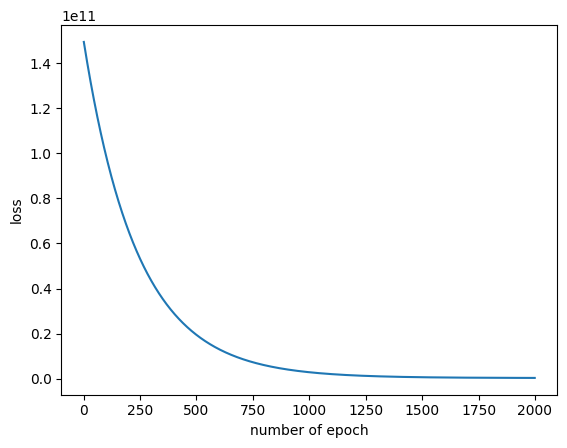

In [37]:
w,b=gradient_descent(X_transform,Y)

print("weight:",w)
print("bias:",b)